In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
from raytrace3D import OnePointTrace3D

From Cerveny, the analytic solution is

$x_i(σ) = x_{i0} + p_{i0}(σ −σ_0)+ \frac{1}{4} g_i(σ −σ_0)^2$

$p_i (σ ) = p_{i0} + \frac{1}{2} g_i (σ − σ_0 )$

$T(σ)=T(σ_0)+S^2(σ−σ_0)+\frac{1}{12}A_ip_{i0}(σ−σ_0)^2+ \frac{1}{12} g_ig_i(σ−σ_0)^3$

with $dσ = Vd\lambda$

In [47]:
takeoff_angle = (25, 0) #inclination, azimuth
lf = 100

dx = 0.10
dy = 0.10
dz = 0.10

x_coords = np.arange(100)*dx
y_coords = np.arange(100)*dy
z_coords = np.arange(100)*dz

xx, yy, zz = np.meshgrid(x_coords, y_coords, z_coords)
velocity = np.sqrt(1.5+1.0*zz)

src_coord = (x_coords[10],y_coords[50],z_coords[30])

tracer = OnePointTrace3D(src_coord=src_coord, 
                         takeoff_angle=takeoff_angle, 
                         velocity=velocity,
                         x_coords=x_coords, 
                         y_coords=y_coords, 
                         z_coords=z_coords,
                         lf=lf)

out = tracer.run(max_step=0.25)
out_x = out['y'][0,:]
out_y = out['y'][1,:]
out_z = out['y'][2,:]
lambdas = out['t']

In [48]:
x_0, y_0, z_0, p_1, p_2, p_3, t_0 = tracer.y0    

def x_analytic(sigma, x_0, p_0, g_i):
    return x_0+p_0*sigma+(1/4)*g_i*(sigma)**2

sigma = np.linspace(0,4)
x_true = x_analytic(sigma=sigma, x_0=tracer.src_coord[0], p_0=tracer.y0[3], g_i=0)
z_true = x_analytic(sigma=sigma, x_0=tracer.src_coord[2], p_0=tracer.y0[5], g_i=1.0)

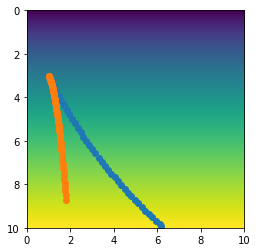

In [49]:
out_x = out['y'][0,:]
out_y = out['y'][1,:]
out_z = out['y'][2,:]
plt.imshow(velocity[:,50,:].T, extent =(0, 10, 10, 0))
plt.scatter(out_x, out_z)
plt.scatter(x_true, z_true)